In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
env = pd.read_csv('data\species\environmental_df.csv')
env = env[["ID","Latitude","Longitude","BIO1", "BIO5","BI06", "BIO12","BIO15"]]
env

,ID,Latitude,Longitude,BIO1,BIO5,BI06,BIO12,BIO15
0,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
1,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
2,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
3,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
4,31529,-18.286728,143.481247,25.830833,36.812252,12.261750,778.0,118.931313
...,...,...,...,...,...,...,...,...
271265,145031,12.899637,79.348824,28.194969,38.084751,18.804251,1020.0,76.790619
271266,145031,22.905533,84.214233,23.526134,37.633999,9.562250,1491.0,122.532074
271267,145031,24.600239,72.730560,23.997032,37.051250,9.970500,1013.0,166.995056
271268,145031,18.849600,80.654129,26.365208,39.693748,13.544250,1547.0,135.629791


In [4]:
#can also try 0.5
grid_size = 0.25

# this will indicate the bottom left corner of the grid cell
#e.g. if lat_grid = -76 and lon_grid = -103 then the grid cell will be from -76 to -75 latitude and -103 to -102 longitude
env['Lat_grid'] = (env['Latitude'] // grid_size) * grid_size
env['Lon_grid'] = (env['Longitude'] // grid_size) * grid_size

# Group by grid cells and aggregate BIO columns with the mean

#can also try median
aggregated_env = env.groupby(['Lat_grid', 'Lon_grid']).agg({
    'BIO1': 'mean',
    'BIO5': 'mean',
    'BI06': 'mean',
    'BIO12': 'mean',
    'BIO15': 'mean'
}).reset_index()

aggregated_env['Grid_ID'] = aggregated_env.groupby(['Lat_grid', 'Lon_grid']).ngroup()
# Each unique pair of Lat_grid and Lon_grid corresponds to a specific area (or "square") on the map
#we have in total 6560 regions in our dataset 
aggregated_env

# with 1 -> 6560
# with 0.5 -> 26240
# with 0.25 -> 28357

,Lat_grid,Lon_grid,BIO1,BIO5,BI06,BIO12,BIO15,Grid_ID
0,-75.50,-102.75,-13.720437,-1.207500,-24.105499,790.000000,50.183361,0
1,-75.50,-0.25,-32.551624,-15.046000,-43.903500,83.000000,110.836205,1
2,-67.75,-68.25,-4.754167,3.131250,-14.678750,381.000000,48.193386,2
3,-66.75,162.50,-8.167043,1.341468,-16.777189,488.666667,44.937639,3
4,-66.00,-66.25,-3.187500,3.333333,-12.133333,672.000000,26.278549,4
...,...,...,...,...,...,...,...,...
28352,71.00,-157.25,-11.632987,10.300000,-30.897444,115.000000,81.526924,28352
28353,71.25,-157.00,-11.842102,9.519620,-30.714241,110.000000,83.444221,28353
28354,71.25,-156.75,-11.906157,9.410833,-30.689167,112.000000,85.202606,28354
28355,72.50,105.00,-13.858052,13.624250,-37.727001,232.000000,42.942741,28355


c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

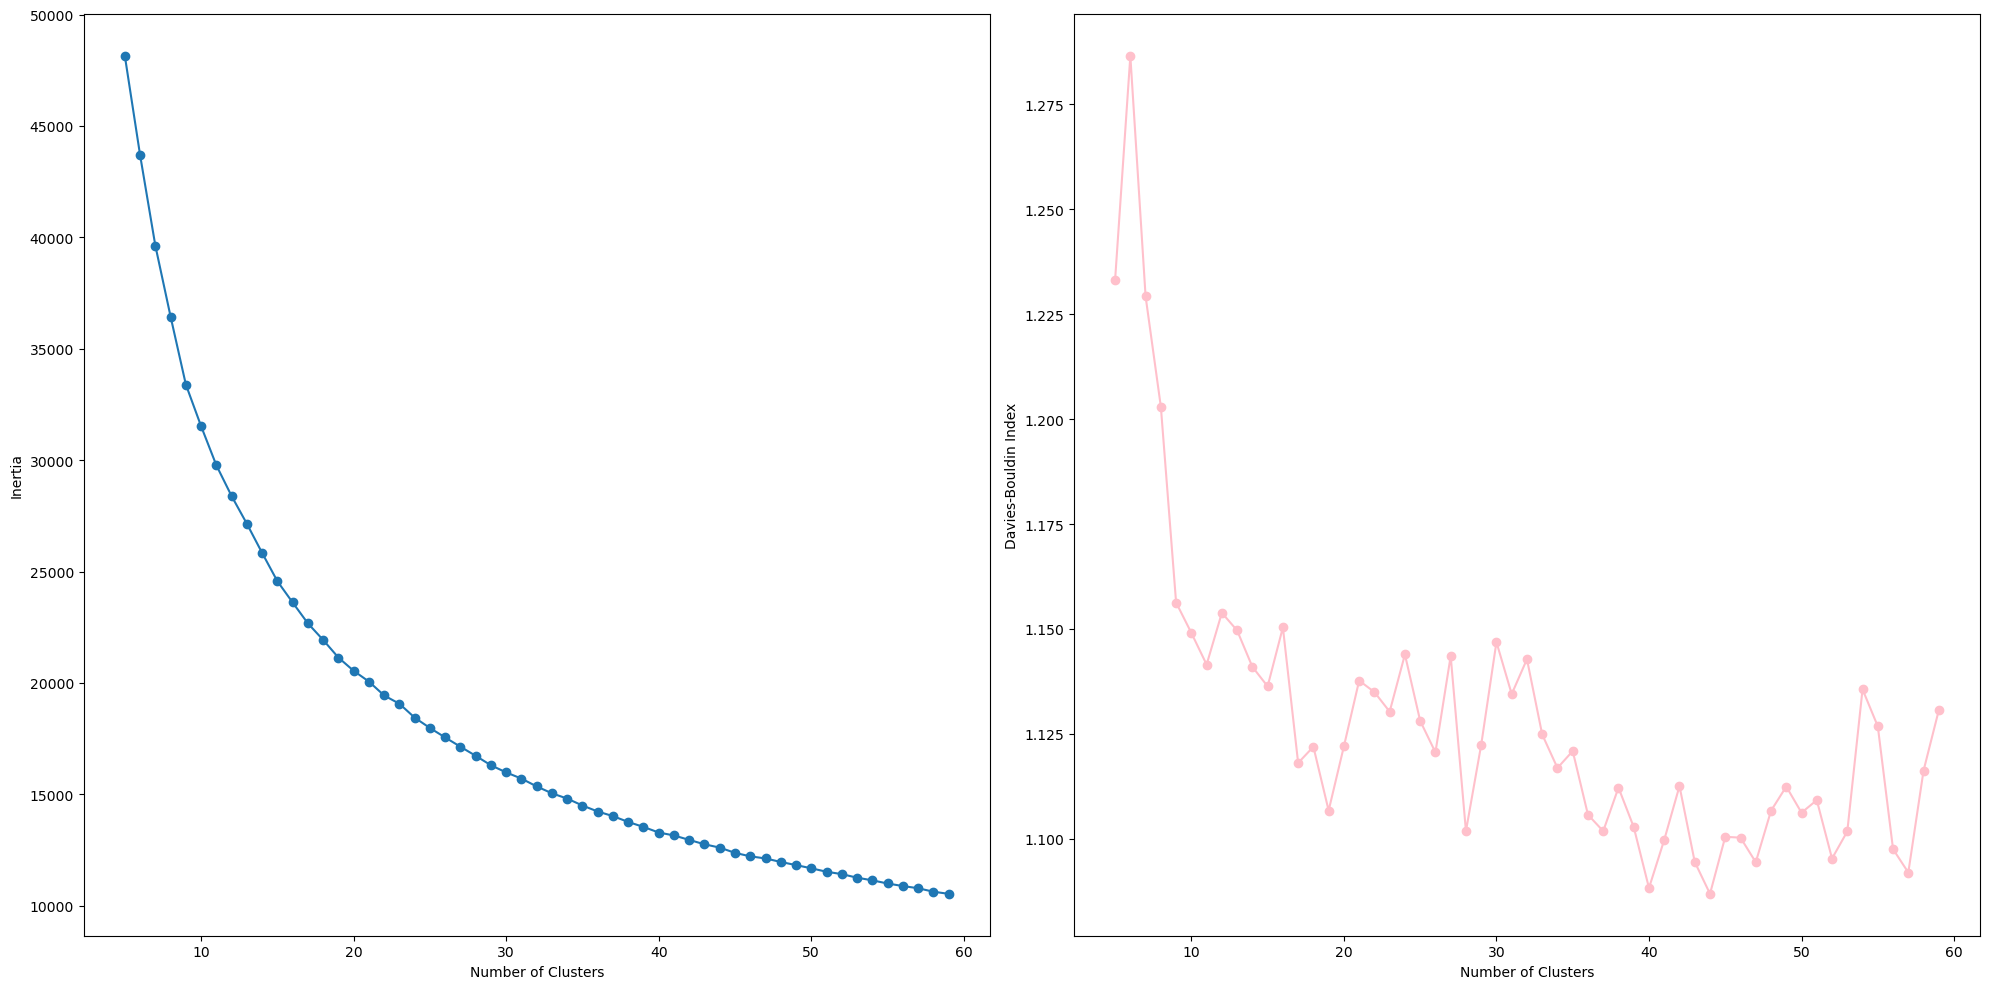

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler



bio_features = aggregated_env[['BIO1', 'BIO5', 'BI06', 'BIO12', 'BIO15']]

# Standardize the features
scaler = StandardScaler()
bio_features_scaled = scaler.fit_transform(bio_features)

cluster_range = range(5, 60)

inertia = []
dbi_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(bio_features_scaled)
    inertia.append(kmeans.inertia_)
    dbi_scores.append(davies_bouldin_score(bio_features_scaled, kmeans.labels_))

# Plot Inertia and Davies-Bouldin Index in a 2x1 grid
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Inertia plot
axes[0].plot(cluster_range, inertia, marker='o', label='Inertia')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')

# DBI plot
axes[1].plot(cluster_range, dbi_scores, marker='o', color='pink', label='Davies-Bouldin Index')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

#elbow looks like 12? also dbi is minimum there

In [6]:
#run
# a little bit not symmetric number of clusters
kmeans = KMeans(n_clusters=20, random_state=42)
aggregated_env["Cluster"]=kmeans.fit_predict(bio_features_scaled)

print(aggregated_env["Cluster"].value_counts())

cluster_stats = aggregated_env.groupby('Cluster').agg(
    BIO1_mean=('BIO1', 'mean'), BIO1_sd=('BIO1', 'std'),
    BIO5_mean=('BIO5', 'mean'), BIO5_sd=('BIO5', 'std'),
    BIO6_mean=('BI06', 'mean'), BIO6_sd=('BI06', 'std'),
    BIO12_mean=('BIO12', 'mean'), BIO12_sd=('BIO12', 'std'),
    BIO15_mean=('BIO15', 'mean'), BIO15_sd=('BIO15', 'std')
).reset_index()


cluster_stats

# example : Cluster 0 represents regions with moderate annual temperatures (mean of 13.43°C) and warm summers (mean max temperature of 27.29°C). 
# These areas experience moderate rainfall (mean annual precipitation of 811.80 mm) and a slight seasonal variation in temperature and precipitation.

c:\Users\annie\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
14    2781
12    2402
6     1909
15    1847
10    1827
17    1825
5     1770
19    1729
1     1546
7     1503
8     1288
0     1279
18    1277
3     1267
11    1115
2      830
9      785
13     634
4      513
16     230
Name: count, dtype: int64


,Cluster,BIO1_mean,BIO1_sd,BIO5_mean,BIO5_sd,BIO6_mean,BIO6_sd,BIO12_mean,BIO12_sd,BIO15_mean,BIO15_sd
0,0,12.843794,3.003773,25.583220,2.905789,0.334693,5.068999,992.769787,344.841971,79.078765,16.842270
1,1,15.738678,1.934765,33.689604,1.831500,-1.372068,3.722764,470.059762,197.943024,60.911769,14.204556
2,2,5.115372,2.704744,17.508854,3.342033,-5.599390,4.671528,1179.325749,322.321579,29.101862,14.449918
3,3,25.356802,1.761057,31.851733,1.919043,18.710395,3.415111,2033.962020,299.020661,60.706550,18.266507
4,4,-4.189177,4.025053,14.389898,5.018291,-21.887043,7.105294,467.471577,235.470665,55.168498,24.859569
5,5,8.585768,1.775817,29.893193,2.081076,-9.902871,3.490100,433.887267,189.430462,43.280698,16.201665
6,6,17.292712,2.043231,32.134857,1.922038,1.963916,3.956319,1316.390527,223.736263,22.854718,9.848585
7,7,25.643507,1.747305,33.909664,2.067957,16.694919,3.331632,1185.484954,316.784324,88.346973,15.674793
8,8,25.567426,1.818740,38.037494,2.758331,11.740097,3.597022,725.167582,371.084523,123.521203,17.772063
9,9,24.941666,2.108286,30.536230,2.238370,19.623434,2.693192,2988.071942,468.387175,38.479138,15.588188


In [ ]:
## significant difference in BIO1, BIO5, BIO6, BIO12, BIO15 between clusters
# test the significance of the difference in the mean values of the BIO columns between clusters    

# found this using chat gpt - Kruskal-Wallis H test
from scipy.stats import kruskal

# Initialize a dictionary to store the p-values of each variable
p_values = {}

# Loop through each bio variable to perform the test across clusters
for variable in ['BIO1', 'BIO5', 'BI06', 'BIO12', 'BIO15']:
    # Group data by cluster and extract the variable values
    groups = [group[variable].values for name, group in aggregated_env.groupby('Cluster')]
    
    # Apply Kruskal-Wallis H test
    stat, p_value = kruskal(*groups)
    p_values[variable] = p_value

# Display the p-values
p_values
# the p values are all 0 indicating that there is a statistical difference between our clusters

{'BIO1': 0.0, 'BIO5': 0.0, 'BI06': 0.0, 'BIO12': 0.0, 'BIO15': 0.0}

In [10]:
final = env.merge(aggregated_env[['Lat_grid', 'Lon_grid', 'Grid_ID', 'Cluster']], on=['Lat_grid', 'Lon_grid'], how='left')
print(final.columns)
final = final[['ID', 'Latitude', 'Longitude', 'Lat_grid', 'Lon_grid', 'Grid_ID', 'Cluster']]

# Rename columns for clarity (if needed)
#final = final.rename(columns={'Grid_ID_x': 'Grid_ID', 'Cluster_x': 'Cluster'})

final["UniqueID"] = final["Grid_ID"].astype(str) + "_" + final["Cluster"].astype(str)
final
#final.to_csv('data\species\df_final.csv', index=False)

Index(['ID', 'Latitude', 'Longitude', 'BIO1', 'BIO5', 'BI06', 'BIO12', 'BIO15',
       'Lat_grid', 'Lon_grid', 'Grid_ID', 'Cluster'],
      dtype='object')


,ID,Latitude,Longitude,Lat_grid,Lon_grid,Grid_ID,Cluster,UniqueID
0,31529,-18.286728,143.481247,-18.50,143.25,5219,8,5219_8
1,31529,-18.286728,143.481247,-18.50,143.25,5219,8,5219_8
2,31529,-18.286728,143.481247,-18.50,143.25,5219,8,5219_8
3,31529,-18.286728,143.481247,-18.50,143.25,5219,8,5219_8
4,31529,-18.286728,143.481247,-18.50,143.25,5219,8,5219_8
...,...,...,...,...,...,...,...,...
271265,145031,12.899637,79.348824,12.75,79.25,9200,7,9200_7
271266,145031,22.905533,84.214233,22.75,84.00,11181,8,11181_8
271267,145031,24.600239,72.730560,24.50,72.50,11541,8,11541_8
271268,145031,18.849600,80.654129,18.75,80.50,10257,8,10257_8


In [12]:
final["Cluster"].value_counts()

Cluster
15    29590
19    24279
14    23440
0     22240
17    21570
6     20370
10    18970
12    15279
7     13134
1     13110
8     11137
5      9940
3      9745
18     9080
11     8906
9      7413
13     5128
2      3832
16     2132
4      1975
Name: count, dtype: int64

C:\Users\annie\AppData\Local\Temp\ipykernel_448\2849876668.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  handles = [mpatches.Patch(color=plt.cm.get_cmap(cmap)(i / max(unique_clusters)), label=f'Cluster {int(i)}') for i in unique_clusters]


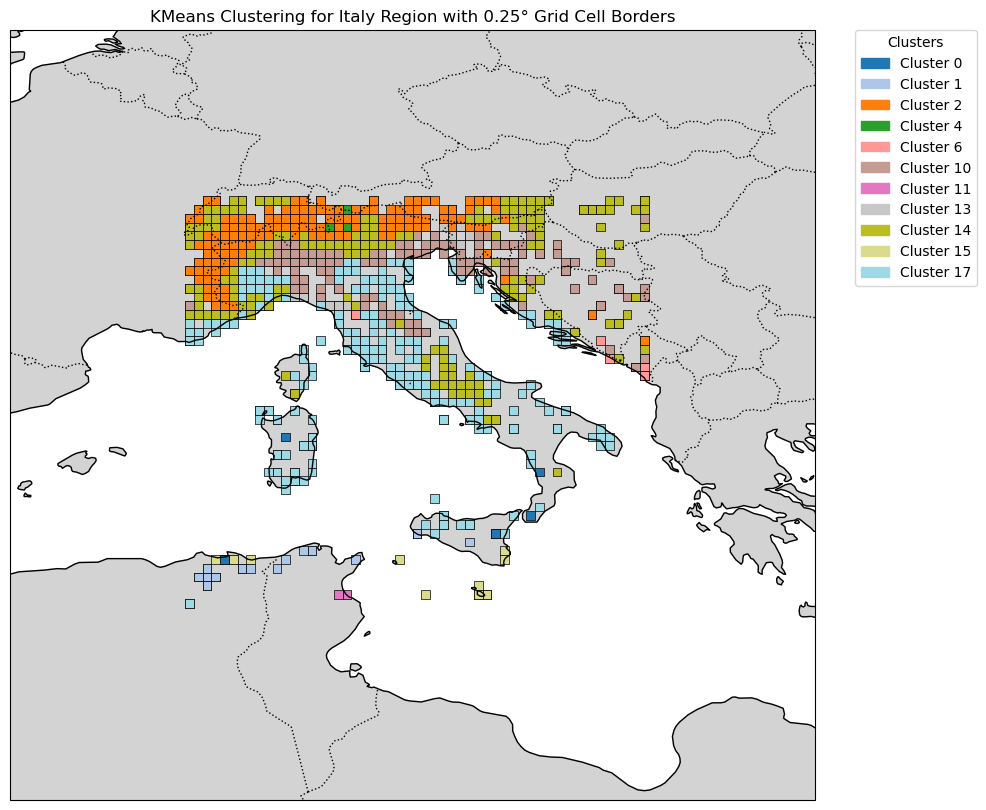

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import matplotlib.patches as mpatches


italy_min_lat, italy_max_lat = 35.0, 47.0   # Latitude range for Italy
italy_min_lon, italy_max_lon = 6.0, 19.0    # Longitude range for Italy

# Filter the final DataFrame for Italy's region
italy_region = final[
    (final['Lat_grid'] >= italy_min_lat) & 
    (final['Lat_grid'] <= italy_max_lat) &
    (final['Lon_grid'] >= italy_min_lon) & 
    (final['Lon_grid'] <= italy_max_lon)
].copy()

def create_square(lat, lon, size=0.25):
    """Create a square polygon for a grid cell starting at (lat, lon) with a specified size."""
    return Polygon([(lon, lat), (lon + size, lat), (lon + size, lat + size), (lon, lat + size)])

# Apply function to create geometry column for individual grid cells
italy_region['geometry'] = italy_region.apply(lambda row: create_square(row['Lat_grid'], row['Lon_grid']), axis=1)

# Create a GeoDataFrame for Italy with individual grid cells
gdf_italy = gpd.GeoDataFrame(italy_region, geometry='geometry')

# Plot the clusters on a map with Cartopy, showing each individual 0.25° grid cell
fig, ax = plt.subplots(1, 1, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([italy_min_lon - 5, italy_max_lon + 5, italy_min_lat - 5, italy_max_lat + 5], crs=ccrs.PlateCarree())

# Add land and borders for context
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Plot the Italy region clusters without aggregating
cmap = 'tab20'
gdf_italy.plot(column='Cluster', cmap=cmap, linewidth=0.5, ax=ax, edgecolor='black', legend=False)

unique_clusters = sorted(italy_region['Cluster'].unique())  # Sort clusters in ascending order
handles = [mpatches.Patch(color=plt.cm.get_cmap(cmap)(i / max(unique_clusters)), label=f'Cluster {int(i)}') for i in unique_clusters]

# Add custom legend in order
plt.legend(handles=handles, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Add custom legend
plt.legend(handles=handles, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Customize plot
ax.set_title("KMeans Clustering for Italy Region with 0.25° Grid Cell Borders")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

#if you see here for example all the alpes are color coded with orange and are different from all the others